import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Load Dataset untuk membaca file Csv

In [ ]:
df = pd.read_csv('/content/Google Play Store Data.csv')  # Ganti path sesuai tempat upload
print("✅ Data Loaded!")
print("\n📌 Preview Data:")
display(df.head())

✅ Data Loaded!

📌 Preview Data:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


 Menampilkan ringkasan struktur kolom dan statistik seperti jumlah data, nilai maksimum, rata-rata, dll

In [ ]:
print("\n📊 Info Dataset:")
df.info()
df.describe()

print("\n📈 Statistik Deskriptif:")
display(df.describe(include='all'))



📊 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB

📈 Statistik Deskriptif:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659.000000,9659,9659,8196.000000,9.659000e+03,8432.000000,9659,9659,9659,9659,9659,9659,9651,9657
unique,NaN,9659,33,NaN,NaN,NaN,21,2,92,6,118,1377,2769,33
top,NaN,iHoroscope - 2018 Daily Horoscope & Astrology,FAMILY,NaN,NaN,NaN,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,NaN,1,1832,NaN,NaN,NaN,1417,8903,8903,7903,826,252,1055,2202
mean,5666.172896,NaN,NaN,4.173243,2.165926e+05,20.395327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3102.362863,NaN,NaN,0.536625,1.831320e+06,21.827509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,1.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3111.500000,NaN,NaN,4.000000,2.500000e+01,4.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5814.000000,NaN,NaN,4.300000,9.670000e+02,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8327.500000,NaN,NaN,4.500000,2.940100e+04,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Hapus baris dengan rating kosong atau lebih dari 5. Menampilkan jumlah baris, kolom, dan cek ringkasan statistik kolom Rating setelah filter

In [ ]:
df = df[df['Rating'].notnull()]
df = df[df['Rating'] <= 5]
print(df.shape)
print(df['Rating'].describe())
print(f"Jumlah data setelah filter rating: {df.shape[0]} baris")

(8196, 14)
count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
Jumlah data setelah filter rating: 8196 baris


Membersihkan dan mengubah nilai pada kolom Installs, Price, dan Size menjadi format numerik agar bisa dianalisis secara statistik atau digunakan dalam model machine learning.

In [ ]:
import numpy as np

df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

def convert_size(size):
    size = str(size)
    if 'M' in size:
        return float(size.replace('M', '').replace(',', '').strip()) * 1_000_000
    elif 'k' in size:
        return float(size.replace('k', '').replace(',', '').strip()) * 1_000
    elif size == 'Varies with device':
        return np.nan
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)


Mmengubah nilai kategori teks di kolom Category, Content Rating, dan Type menjadi angka menggunakan Label Encoding, serta menampilkan hasil mapping-nya.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_cols = ['Category', 'Content Rating', 'Type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"Label encoding untuk kolom '{col}':")
    for i, class_name in enumerate(le.classes_):
        print(f"  {i} -> {class_name}")
    print("\n")

df[categorical_cols].head()


Label encoding untuk kolom 'Category':
  0 -> ART_AND_DESIGN
  1 -> AUTO_AND_VEHICLES
  2 -> BEAUTY
  3 -> BOOKS_AND_REFERENCE
  4 -> BUSINESS
  5 -> COMICS
  6 -> COMMUNICATION
  7 -> DATING
  8 -> EDUCATION
  9 -> ENTERTAINMENT
  10 -> EVENTS
  11 -> FAMILY
  12 -> FINANCE
  13 -> FOOD_AND_DRINK
  14 -> GAME
  15 -> HEALTH_AND_FITNESS
  16 -> HOUSE_AND_HOME
  17 -> LIBRARIES_AND_DEMO
  18 -> LIFESTYLE
  19 -> MAPS_AND_NAVIGATION
  20 -> MEDICAL
  21 -> NEWS_AND_MAGAZINES
  22 -> PARENTING
  23 -> PERSONALIZATION
  24 -> PHOTOGRAPHY
  25 -> PRODUCTIVITY
  26 -> SHOPPING
  27 -> SOCIAL
  28 -> SPORTS
  29 -> TOOLS
  30 -> TRAVEL_AND_LOCAL
  31 -> VIDEO_PLAYERS
  32 -> WEATHER


Label encoding untuk kolom 'Content Rating':
  0 -> Adults only 18+
  1 -> Everyone
  2 -> Everyone 10+
  3 -> Mature 17+
  4 -> Teen
  5 -> Unrated


Label encoding untuk kolom 'Type':
  0 -> Free
  1 -> Paid




,Category,Content Rating,Type
0,0,1,0
1,0,1,0
2,0,1,0
3,0,4,0
4,0,1,0


Memilih fitur dan target

In [ ]:
features = ['Category', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating', 'Type']
X = df[features]
y = df['Rating']
print(X.head())
print(y.head())

   Category  Reviews  Size  Installs  Price  Content Rating  Type
0         0      159   NaN     10000    0.0               1     0
1         0      967   NaN    500000    0.0               1     0
2         0    87510   NaN   5000000    0.0               1     0
3         0   215644   NaN  50000000    0.0               4     0
4         0      967   NaN    100000    0.0               1     0
0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64


 Split data training dan testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      Category  Reviews  Size  Installs  Price  Content Rating  Type
3075        19    65590   NaN   5000000    0.0               1     0
3981        18      377   NaN    100000    0.0               1     0
5402        19      230   NaN     10000    0.0               1     0
6567        26      199   NaN     10000    0.0               1     0
2571        29   148506   NaN   5000000    0.0               1     0
      Category  Reviews  Size  Installs  Price  Content Rating  Type
3007        21    84957   NaN   1000000   0.00               2     0
6005        14       15   NaN        50   0.00               1     0
2241        24    55427   NaN  10000000   0.00               1     0
7663        11     1013   NaN     50000   2.99               1     1
4325        11        7   NaN      1000   0.00               1     0
3075    4.5
3981    3.4
5402    3.9
6567    4.3
2571    4.5
Name: Rating, dtype: float64
3007    4.4
6005    4.6
2241    3.9
7663    4.2
4325    3.9
Name: Rating, dtype: fl

Training model Decision Tree Regression

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

Prediksi dan Evaluasi

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediksi menggunakan model Decision Tree Regressor
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Decision Tree Regressor")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")


Evaluasi Decision Tree Regressor
R² Score: -0.5889
Mean Squared Error (MSE): 0.49
Mean Absolute Error (MAE): 0.47


Visualisasi perbandingan antara nilai aktual (y_test) dan nilai prediksi (y_pred) dalam bentuk scatter plot, dengan garis merah sebagai referensi yang menunjukkan prediksi yang sempurna, di mana titik-titik prediksi harus sejajar dengan garis tersebut.

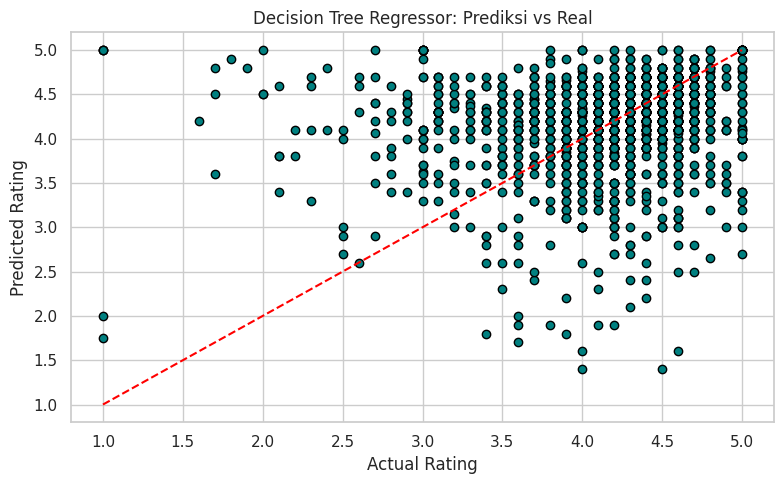

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

#Training Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

#Prediksi
y_pred = model.predict(X_test)

#Visualisasi Prediksi vs Real
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='teal', edgecolor='black')  # Titik prediksi vs aktual
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Garis referensi
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Decision Tree Regressor: Prediksi vs Real")
plt.grid(True)
plt.tight_layout()
plt.show()


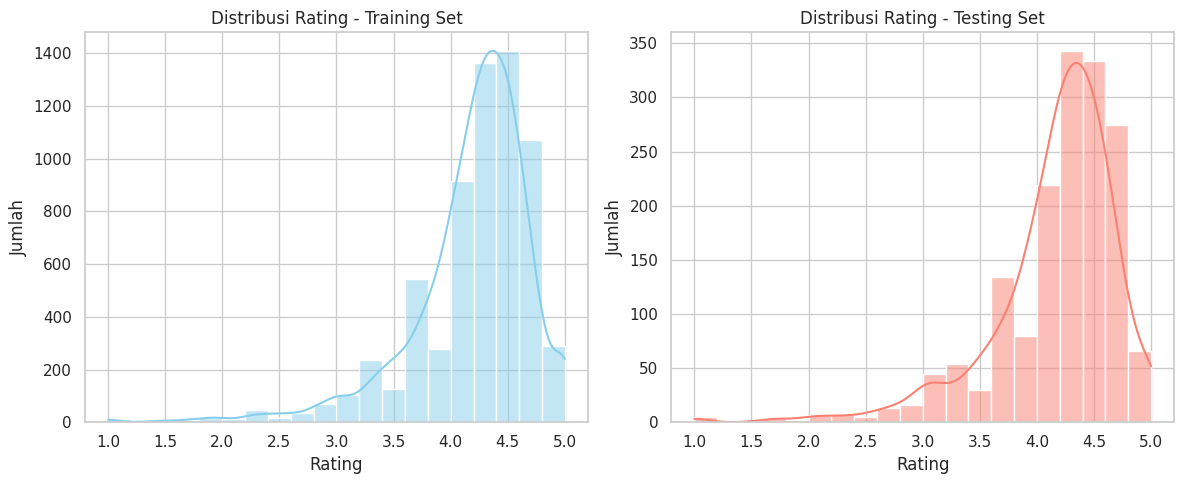

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi
sns.set(style="whitegrid")

# Membuat figure dengan 2 subplot
plt.figure(figsize=(12, 5))

# Distribusi y_train
plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rating - Training Set')
plt.xlabel('Rating')
plt.ylabel('Jumlah')

# Distribusi y_test
plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=20, kde=True, color='salmon')
plt.title('Distribusi Rating - Testing Set')
plt.xlabel('Rating')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()


<ipython-input-23-16d26a569f00>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')
<ipython-input-23-16d26a569f00>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='Set2')


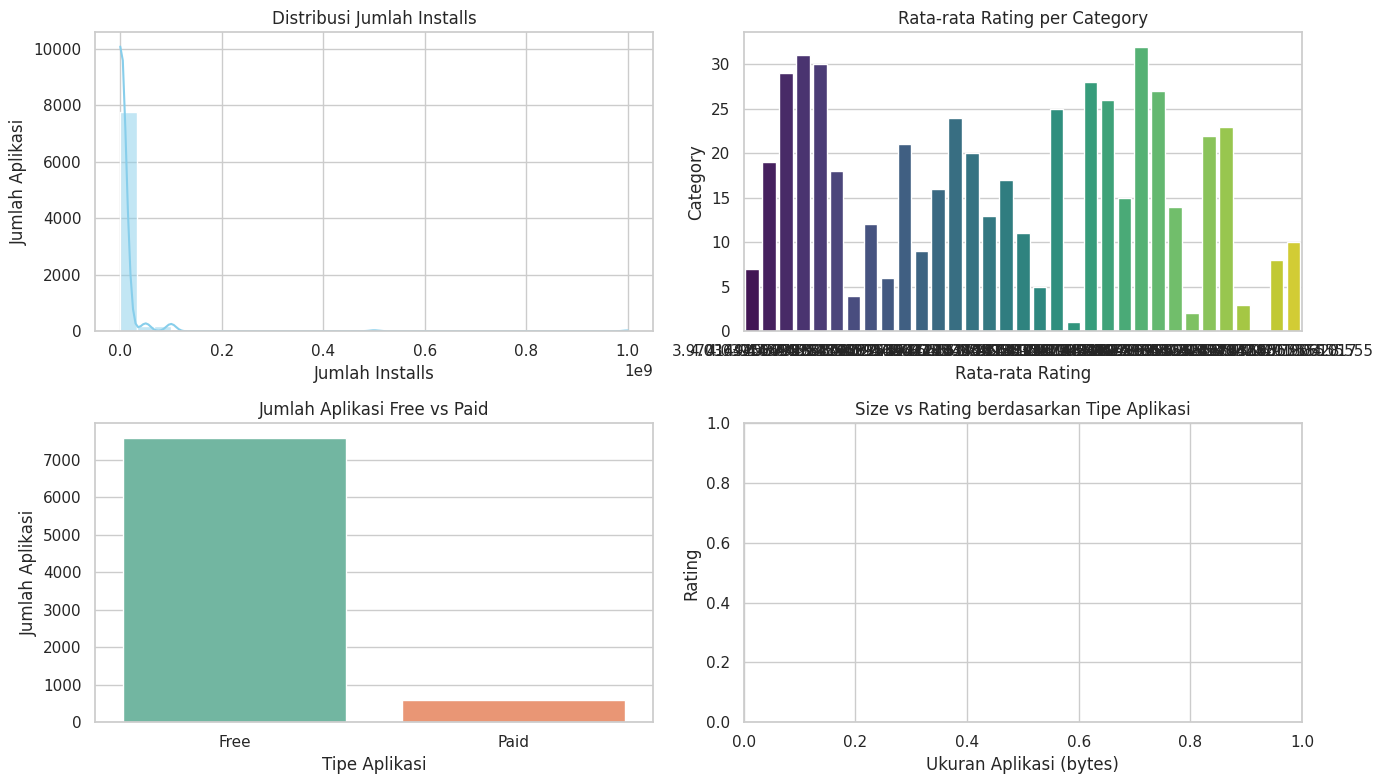

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# 1. Distribusi Jumlah Installs
plt.subplot(2, 2, 1)
sns.histplot(df['Installs'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Installs')
plt.xlabel('Jumlah Installs')
plt.ylabel('Jumlah Aplikasi')

# 2. Rata-rata Rating per Category
plt.subplot(2, 2, 2)
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')
plt.title('Rata-rata Rating per Category')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Category')

# 3. Perbandingan Type (Free vs Paid)
plt.subplot(2, 2, 3)
sns.countplot(x='Type', data=df, palette='Set2')
plt.title('Jumlah Aplikasi Free vs Paid')
plt.xlabel('Tipe Aplikasi')
plt.ylabel('Jumlah Aplikasi')
plt.xticks(ticks=[0, 1], labels=['Free', 'Paid'])  # Kalau sudah di-label encode

# 4. Hubungan Size vs Rating
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Size', y='Rating', hue='Type', alpha=0.6)
plt.title('Size vs Rating berdasarkan Tipe Aplikasi')
plt.xlabel('Ukuran Aplikasi (bytes)')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()


In [ ]:
df.dropna(subset=['Installs', 'Size', 'Rating', 'Price', 'Type', 'Category'], inplace=True)
print(f"Jumlah baris sebelum dropna: {df.shape[0]}")
df.dropna(subset=['Installs', 'Size', 'Rating', 'Price', 'Type', 'Category'], inplace=True)
print(f"Jumlah baris setelah dropna: {df.shape[0]}")
print(df.head())
print(df[['Installs', 'Size', 'Rating', 'Price', 'Type', 'Category']].isna().sum())



Jumlah baris sebelum dropna: 0
Jumlah baris setelah dropna: 0
Empty DataFrame
Columns: [Unnamed: 0, App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []
Installs    0
Size        0
Rating      0
Price       0
Type        0
Category    0
dtype: int64
